In [1]:
import prepare as ppr
import acquire as aq 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
from sklearn.tree import DecisionTreeClassifier as DTree
from sklearn.neighbors import KNeighborsClassifier as KNClass

In [3]:
total_df = ppr.prep_telco(aq.get_telco_data())

In [4]:
first_years_df_total = total_df[total_df['tenure'] <= 12]
senior_df_total = total_df[total_df['tenure'] > 12]
tdf = total_df

## Grab only numeric Datafields

In [5]:
first_years_df = first_years_df_total[[
 'tenure',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'tenure_yearly',
 'phone_id',
 'movies_encode',
 'tv_encode',
 'streaming_services',
 'online_security_encode',
 'online_backup_encode',
 'online_security_backup',
 'household_type_id',
 'gender_encode',
 'paperless_billing_encode',
 'tech_support_encode',
 'payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'device_protection_encode',
 'monthly_charges',
 'total_charges',
 'churn_encode']]

In [6]:
senior_df = senior_df_total[[
 'tenure',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'tenure_yearly',
 'phone_id',
 'movies_encode',
 'tv_encode',
 'streaming_services',
 'online_security_encode',
 'online_backup_encode',
 'online_security_backup',
 'household_type_id',
 'gender_encode',
 'paperless_billing_encode',
 'tech_support_encode',
 'payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'device_protection_encode',
 'monthly_charges',
 'total_charges',
 'churn_encode']]

In [7]:
tdf = tdf[['tenure',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'tenure_yearly',
 'phone_id',
 'movies_encode',
 'tv_encode',
 'streaming_services',
 'online_security_encode',
 'online_backup_encode',
 'online_security_backup',
 'household_type_id',
 'gender_encode',
 'paperless_billing_encode',
 'tech_support_encode',
 'payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'device_protection_encode',
 'monthly_charges',
 'total_charges',
 'churn_encode']]

## Explore

####  Display the Distrubution of Monthly charges, tenure, total charges and tenure years

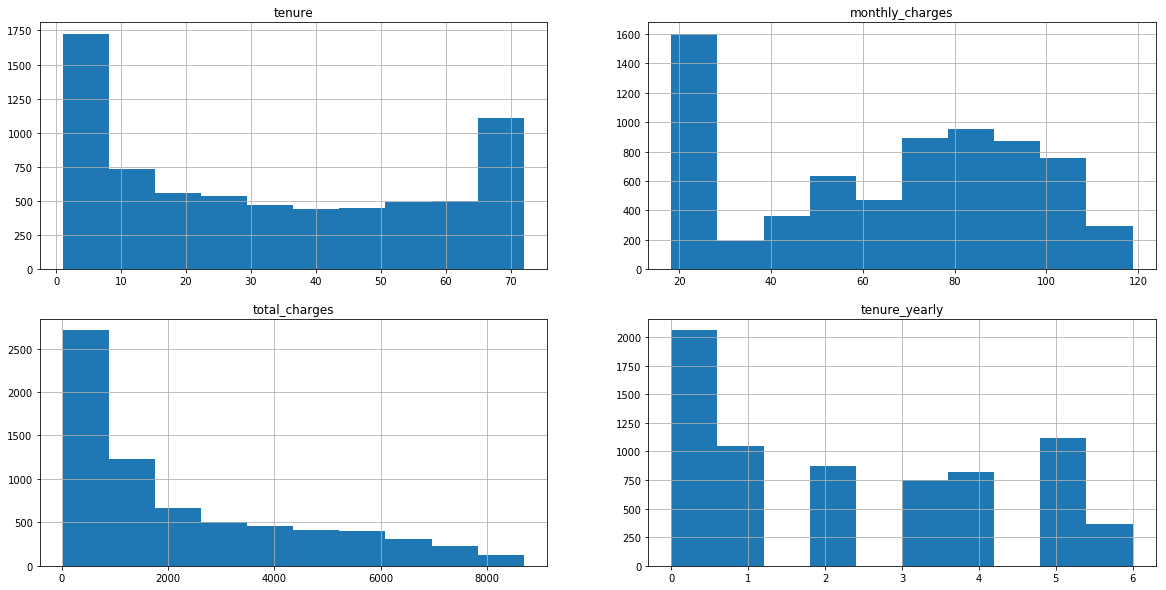

In [8]:
plt.figure(figsize=(20,10))
for i, col in enumerate(['tenure', 'monthly_charges',
       'total_charges', 'tenure_yearly']):
    plot_number = i + 1
    series = tdf[col]
    plt.subplot(2, 2, plot_number)
    plt.title(col)
    series.hist(bins=10, density=False, cumulative=False, log=False)

#### Boxplots of Tenures and Charges

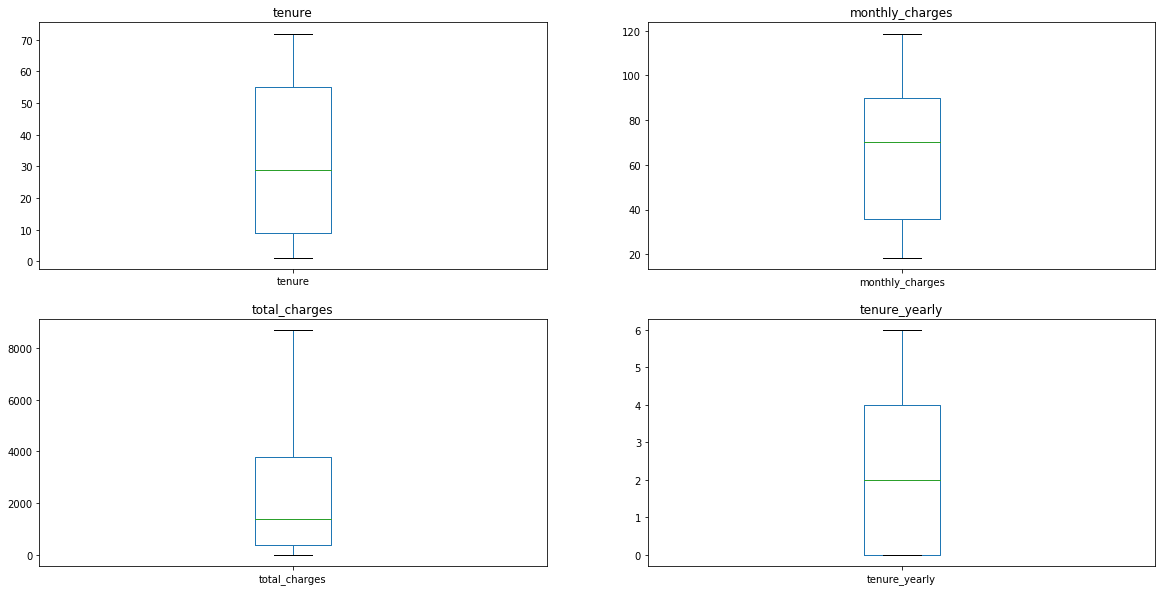

In [9]:
plt.figure(figsize=(20,10))
for i, col in enumerate(['tenure', 'monthly_charges',
       'total_charges', 'tenure_yearly']):
    plot_number = i + 1
    series = tdf[col]
    plt.subplot(2, 2, plot_number)
    plt.title(col)
    series.plot.box()#logy=True)

In [10]:
### Shorthand dataframe names for simplicity, and data manip without
### Changing original Dataframes
fdf = first_years_df.copy()#[['tenure','streaming_services','internet_service_type_id','contract_type_id','monthly_charges','churn_encode']]
sdf = senior_df.copy()#[['tenure','streaming_services','internet_service_type_id','contract_type_id','monthly_charges','churn_encode']]

### Ttest of Churn between two populations

In [11]:
p_value_of_ttest = (list(ttest_ind(sdf['churn_encode'],fdf['churn_encode'])))[1]

In [12]:
p_value_of_ttest

9.215808687242088e-167

The P value is MUCH less than 0.05, therefore the populations are significantly different

Let's check the Churn drivers between the two populations

### Churn Drivers for Year 1's different than Long Terms

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


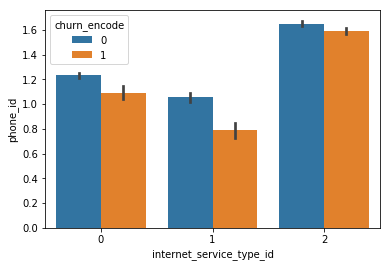

In [13]:
sns.barplot('internet_service_type_id', 'phone_id', data=tdf, hue='churn_encode')

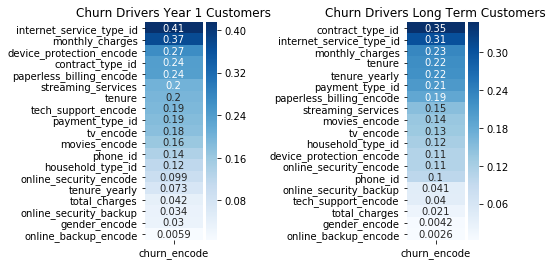

In [14]:

plt.subplot(141)
plt.title('Churn Drivers Year 1 Customers')
sns.heatmap((fdf.corr()[['churn_encode']].drop('churn_encode')).abs().sort_values('churn_encode', ascending = False),annot = True, cmap = 'Blues')

plt.subplot(144)
plt.title('Churn Drivers Long Term Customers')
sns.heatmap((sdf.corr()[['churn_encode']].drop('churn_encode')).abs().sort_values('churn_encode', ascending = False),annot = True, cmap = 'Blues')


Grab important fields for different DataFrames

In [15]:
sdf = sdf[['contract_type_id', 'internet_service_type_id','monthly_charges','tenure','churn_encode','total_charges']]

In [16]:
fdf = fdf[['internet_service_type_id','monthly_charges','contract_type_id','streaming_services','total_charges','churn_encode']]


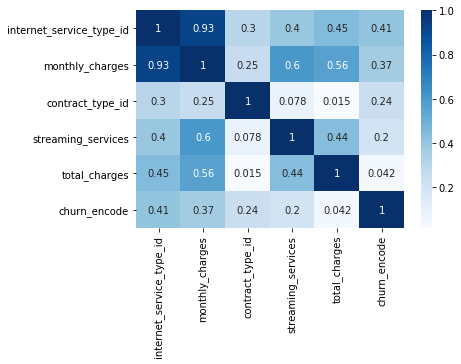

In [17]:
sns.heatmap((fdf.corr()).abs(),cmap='Blues',annot=True)

## 1 Year Contracts vs m2m contracts at 12 month point

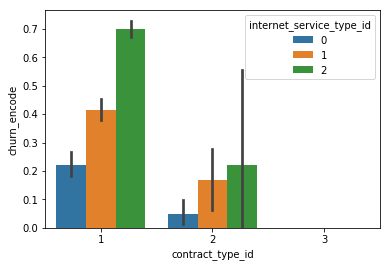

In [18]:
tenure_13 = tdf[tdf['tenure'] <= 13]
sns.barplot('contract_type_id', 'churn_encode', data=tenure_13, hue='internet_service_type_id')

### Model Building Based on these fields

Train Test Split + Scaling

In [19]:
train_sdf, test_sdf = ppr.scale_split_data(*train_test_split(sdf,random_state=55))
train_fdf, test_fdf = ppr.scale_split_data(*train_test_split(fdf,random_state=22))
#train,test = ppr.scale_split_data(*train_test_split(tdf,random_state =55))

Drop non-scaled fields in all 4 dataframes

In [20]:
train_sdf.drop(['monthly_charges','total_charges','total_charges_scaled'],axis =1,inplace = True)
test_sdf.drop(['monthly_charges','total_charges','total_charges_scaled'],axis =1,inplace = True)
train_fdf.drop(['monthly_charges','total_charges','monthly_charges_scaled','total_charges_scaled'],axis =1,inplace = True)
test_fdf.drop(['monthly_charges','total_charges','monthly_charges_scaled','total_charges_scaled'],axis =1,inplace = True)


Senior Logisitc Regression prediction

In [21]:
logit_sdf = LogisticRegression()
logit_sdf.fit(train_sdf.drop(columns='churn_encode'),train_sdf[['churn_encode']])
sdf_pred_train = logit_sdf.predict(train_sdf.drop(columns='churn_encode'))
sdf_pred = logit_sdf.predict(test_sdf.drop(columns='churn_encode'))


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
(test_sdf['churn_encode'] == sdf_pred).sum() / test_sdf.shape[0]

0.8452674897119341

##### Classification report:

In [23]:
print(classification_report(test_sdf['churn_encode'],sdf_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1019
           1       0.57      0.16      0.25       196

   micro avg       0.85      0.85      0.85      1215
   macro avg       0.72      0.57      0.58      1215
weighted avg       0.81      0.85      0.81      1215



Freshman Logistic Regression prediction

In [24]:
logit_fdf = LogisticRegression()
logit_fdf.fit(train_fdf.drop(columns='churn_encode'),train_fdf[['churn_encode']])
fdf_pred_train = logit_fdf.predict(train_fdf.drop(columns='churn_encode'))
fdf_pred = logit_fdf.predict(test_fdf.drop(columns='churn_encode'))


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
print(f"Accuracy: {(test_fdf['churn_encode'] == fdf_pred).sum() / test_fdf.shape[0]*100} ")

Accuracy: 72.24264705882352 


##### Classification report:

In [26]:
print(classification_report(test_fdf['churn_encode'],fdf_pred))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75       287
           1       0.74      0.63      0.68       257

   micro avg       0.72      0.72      0.72       544
   macro avg       0.73      0.72      0.72       544
weighted avg       0.72      0.72      0.72       544



## Running other classification models

### Tree:

In [27]:
tree_fdf = DTree()

In [28]:
tree_fdf.fit(train_fdf.drop(columns='churn_encode'),train_fdf[['churn_encode']])
tfdf_pred = logit_fdf.predict(test_fdf.drop(columns='churn_encode'))


In [29]:
print(f"Accuracy: {(test_fdf['churn_encode'] == tfdf_pred).sum() / test_fdf.shape[0]*100} ")

Accuracy: 72.24264705882352 


### KNN: 

In [30]:
knn_fdf = KNClass()

In [31]:
knn_fdf.fit(train_fdf.drop(columns='churn_encode'),train_fdf[['churn_encode']])

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [32]:
kfdf_pred = logit_fdf.predict(test_fdf.drop(columns='churn_encode'))

In [33]:
print(f"Accuracy: {(test_fdf['churn_encode'] == kfdf_pred).sum() / test_fdf.shape[0]*100} ")

Accuracy: 72.24264705882352 


## Conclusion for other models:

With the last three classification models, they all yielded the same results for the dataset. 

# Overall conclusions

Customers churn correlates differently depending on how long they have been with a customer. 

Controlling for tenure leads to more accurate prediction results

## CSV Creation

In [34]:
### Combine sdf_train + sdf_pred
sdf_train_total = train_sdf[[
 'churn_encode',
 ]]
sdf_train_total['predicted_churn'] = sdf_pred_train

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [35]:
### Combine sdf_test + sdf_test_pred
sdf_test_total = test_sdf[[
 'churn_encode',
 ]]
sdf_test_total['predicted_churn'] = sdf_pred

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [36]:
### combine sdf_test + sdf_train
sdf_final = pd.concat([sdf_train_total,sdf_test_total])

In [37]:
list(train_fdf.columns)

['internet_service_type_id',
 'contract_type_id',
 'streaming_services',
 'churn_encode']

In [38]:
### Combine fdf_train + fdf_pred
fdf_train_total = train_fdf[[
 'churn_encode'
 ]]
fdf_train_total['predicted_churn'] = fdf_pred_train

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [39]:
### Combine fdf_train + fdf_pred
fdf_test_total = test_fdf[[
 'churn_encode'
 ]]
fdf_test_total['predicted_churn'] = fdf_pred

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [40]:
### combine fdf_test + fdf_train
fdf_final = pd.concat([fdf_train_total,fdf_test_total])

In [41]:
fdf_and_sdf = pd.concat([fdf_final,sdf_final])

In [42]:
fdf_and_sdf

,churn_encode,predicted_churn
115,0,0
4249,1,1
4152,0,1
101,0,0
388,1,0
2673,0,1
2885,1,1
211,0,0
5776,0,0
2965,1,1
